In [1]:
import os, glob, time, datetime
import numpy as np
from PIL import Image, ImageFont
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import torch.nn as nn
from torchvision.utils import save_image

from common.dataset import TrainDataProvider, save_fixed_sample
from common.function import init_embedding
from common.models import Encoder, Decoder, Discriminator, Generator
from common.utils import denorm_image, centering_image, tight_crop_image
from common.train import Trainer
from get_data.font2img import draw_single_char, draw_example
from get_data.package import pickle_examples

## pre-trained model Training with New 75000 dataset
- pre-trained model의 성능을 향상시키기 위하여 새로운 7만자로 학습시킨다

In [2]:
GPU = torch.cuda.is_available()
GPU

True

### 새로운 dataset 생성

In [3]:
# from_dir = './get_data/hangul-dataset-11172/'
# save_dir = './dataset/new_training'
# train_path = os.path.join(save_dir, "train.obj")
# val_path = os.path.join(save_dir, "val.obj")

# pickle_examples(from_dir, train_path=train_path, val_path=val_path, \
#                 with_charid=True, train_val_split=1-0.33) # 75000

### Save Fixed sample

In [4]:
# sample_size = 48
# img_size = 128
# fontid = 0
# data_dir = './dataset/new_training'
# save_dir = './fixed_sample/new_training'

# save_fixed_sample(sample_size, img_size, data_dir, save_dir)

### Trainer 객체 생성

In [5]:
data_dir = './dataset/new_training'
fixed_dir = './fixed_sample/new_training'
fixed_id = 0
fonts_num = 25
batch_size = 16
img_size = 128

In [6]:
trainer = Trainer(GPU, data_dir, fixed_dir, fonts_num, batch_size, img_size)

unpickled total 75234 examples
unpickled total 151425 examples
train examples -> 75234, val examples -> 151425
total batches: 4703


### Ground Truth Target

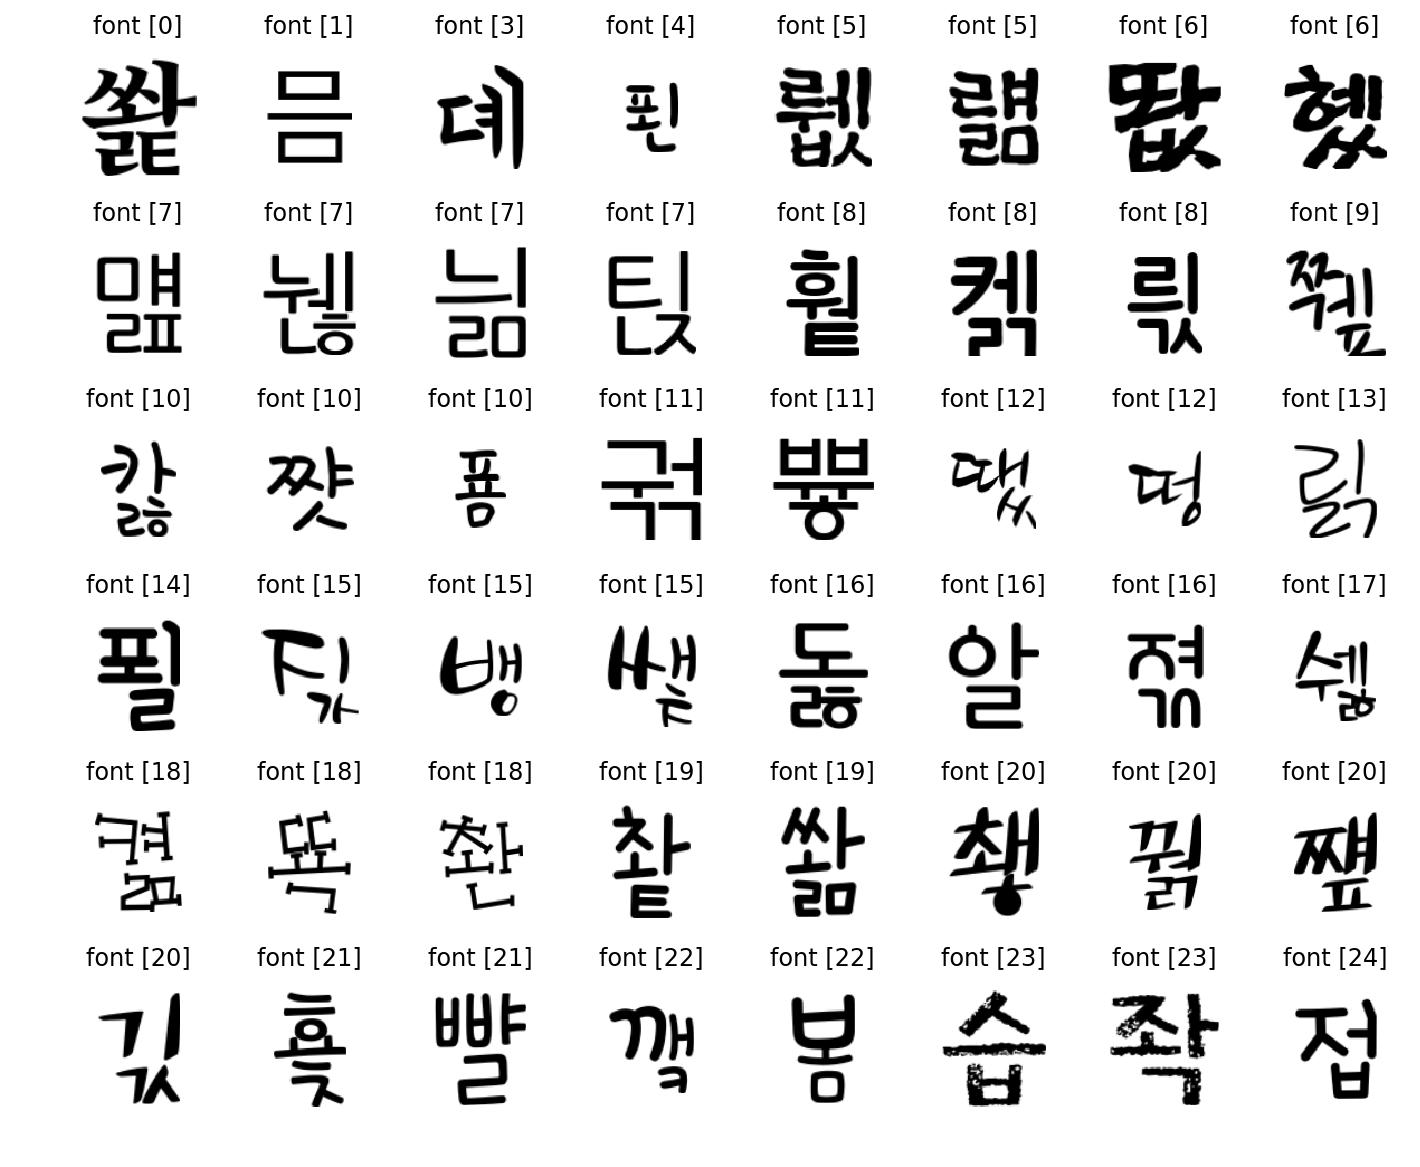

In [24]:
fixed_target = torch.load(os.path.join(fixed_dir, 'fixed_target.pkl'))
fixed_label = torch.load(os.path.join(fixed_dir, 'fixed_label.pkl'))

plt.figure(figsize=(12, 10))
for idx, image in enumerate(fixed_target):
    plt.subplot(6, 8, idx+1)
    plt.imshow(image.reshape(128, 128).cpu().numpy(), cmap='gray')
    plt.axis('off')
    plt.title('font [%d]' % fixed_label[idx])
plt.show()

In [25]:
fixed_dir = './fixed_fake/'
save_image(denorm_image(fixed_target.data), \
           os.path.join(fixed_dir, 'fixed_target_ground_truth.png'), \
           nrow=8, pad_value=255)

---

### 150~180 epoch
- 계속 학 습 시키자

- 220s /1000iter, 0.22s/1iter, 17m/1epoch, `8시간 30분/30epoch`

In [29]:
save_path = './fixed_fake/'
to_model_path = './model_checkpoint/new_training'
from_model_path = './model_checkpoint/'
restore = ['150-0604-10:42-Encoder.pkl', '150-0604-10:42-Decoder.pkl', '150-0604-10:42-Discriminator.pkl']

max_epoch = 30
schedule = 40
lr = 0.00025
log_step = 1000
sample_step = 2000

losses = trainer.train(max_epoch=max_epoch, schedule=schedule, save_path=save_path, \
                       lr=lr, log_step=log_step, sample_step=sample_step, restore=restore, \
                       to_model_path=to_model_path, from_model_path=from_model_path, \
                       with_charid=True, save_nrow=8, fine_tune=True)

150 epoch trained model has restored
04:22:16 Epoch [151/180], step [1000/4703], l1_loss: 85.3560, d_loss: 0.0147, g_loss: 100.6190
04:25:58 Epoch [151/180], step [2000/4703], l1_loss: 63.9287, d_loss: 0.1648, g_loss: 80.2941
04:29:40 Epoch [151/180], step [3000/4703], l1_loss: 78.5651, d_loss: 0.0033, g_loss: 92.5882
04:33:22 Epoch [151/180], step [4000/4703], l1_loss: 66.0622, d_loss: 0.0071, g_loss: 82.0341
04:39:39 Epoch [152/180], step [1000/4703], l1_loss: 81.9457, d_loss: 0.0229, g_loss: 88.1806
04:43:21 Epoch [152/180], step [2000/4703], l1_loss: 67.2017, d_loss: 0.0224, g_loss: 79.4348
04:47:35 Epoch [152/180], step [3000/4703], l1_loss: 57.2992, d_loss: 0.9390, g_loss: 69.3094
04:51:48 Epoch [152/180], step [4000/4703], l1_loss: 64.6129, d_loss: 0.0271, g_loss: 79.5834
05:03:03 Epoch [153/180], step [1000/4703], l1_loss: 66.9757, d_loss: 0.0041, g_loss: 78.8937
05:06:52 Epoch [153/180], step [2000/4703], l1_loss: 68.5735, d_loss: 0.0049, g_loss: 76.6639
05:10:33 Epoch [153/18

10:59:37 Epoch [172/180], step [4000/4703], l1_loss: 51.2655, d_loss: 0.0014, g_loss: 59.8563
11:05:54 Epoch [173/180], step [1000/4703], l1_loss: 62.7693, d_loss: 0.2505, g_loss: 80.1393
11:09:35 Epoch [173/180], step [2000/4703], l1_loss: 59.5828, d_loss: 0.0015, g_loss: 74.6521
11:13:16 Epoch [173/180], step [3000/4703], l1_loss: 54.3295, d_loss: 0.0740, g_loss: 62.0164
11:16:57 Epoch [173/180], step [4000/4703], l1_loss: 60.6283, d_loss: 0.0001, g_loss: 82.3051
11:23:15 Epoch [174/180], step [1000/4703], l1_loss: 62.7709, d_loss: 0.0088, g_loss: 73.1099
11:26:57 Epoch [174/180], step [2000/4703], l1_loss: 63.3425, d_loss: 0.0312, g_loss: 70.0662
11:30:39 Epoch [174/180], step [3000/4703], l1_loss: 62.3783, d_loss: 0.0076, g_loss: 75.1120
11:34:20 Epoch [174/180], step [4000/4703], l1_loss: 60.8488, d_loss: 0.0009, g_loss: 72.7957
11:40:39 Epoch [175/180], step [1000/4703], l1_loss: 67.7613, d_loss: 0.0007, g_loss: 76.9965
11:44:20 Epoch [175/180], step [2000/4703], l1_loss: 56.9723

### losses

In [30]:
l1_losses, const_losses, category_losses, d_losses, g_losses = losses

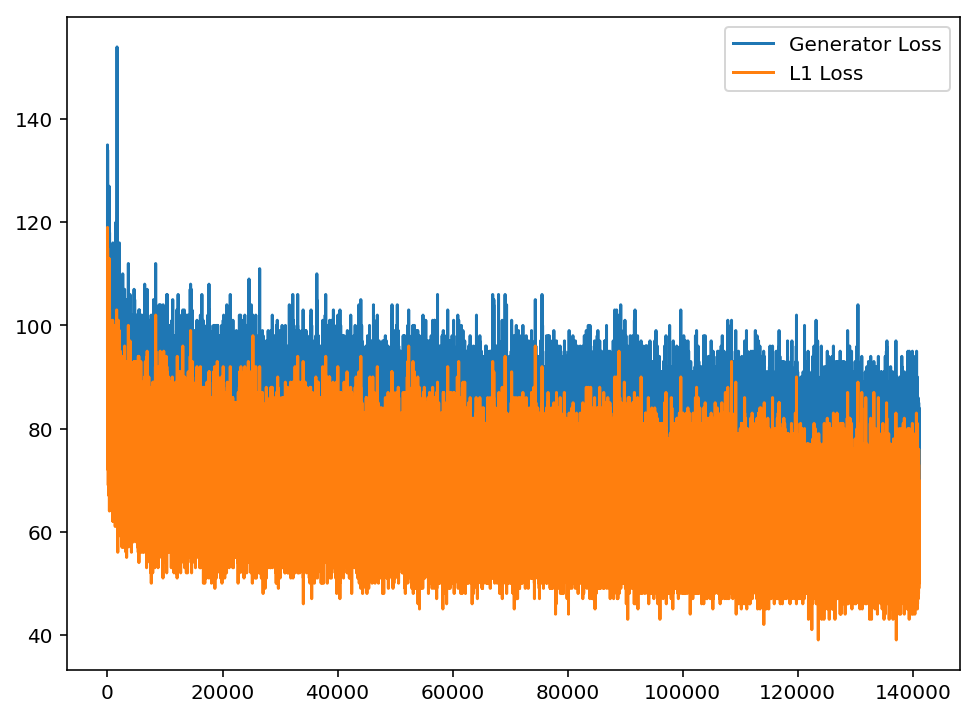

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(g_losses, label='Generator Loss')
plt.plot(l1_losses, label='L1 Loss')
plt.legend()
plt.show()

In [34]:
print('initial loss:', np.mean(g_losses[5000:10000]), '->', 'last loss:', np.mean(g_losses[-5000:]))

initial loss: 81.506 -> last loss: 70.4564


### 181~200 epoch
- 5시간 40분 / 20epoch

- 3시 ~ 8시 40분

In [9]:
save_path = './fixed_fake/'
to_model_path = './model_checkpoint/new_training'
from_model_path = './model_checkpoint/new_training'
restore = ['190-0611-09:14-Encoder.pkl', '190-0611-09:14-Decoder.pkl', '190-0611-09:14-Discriminator.pkl']

max_epoch = 10
schedule = 40
lr = 0.00025
log_step = 1000
sample_step = 2000

losses = trainer.train(max_epoch=max_epoch, schedule=schedule, save_path=save_path, \
                       lr=lr, log_step=log_step, sample_step=sample_step, restore=restore, \
                       to_model_path=to_model_path, from_model_path=from_model_path, \
                       with_charid=True, save_nrow=8, fine_tune=True)

190 epoch trained model has restored
11:01:33 Epoch [191/200], step [1000/4703], l1_loss: 48.6542, d_loss: 0.0006, g_loss: 58.9468
11:05:09 Epoch [191/200], step [2000/4703], l1_loss: 48.5547, d_loss: 0.0008, g_loss: 59.3694
11:08:44 Epoch [191/200], step [3000/4703], l1_loss: 51.3266, d_loss: 0.0010, g_loss: 64.3702
11:12:19 Epoch [191/200], step [4000/4703], l1_loss: 65.9141, d_loss: 0.0017, g_loss: 79.3055
11:18:27 Epoch [192/200], step [1000/4703], l1_loss: 56.0598, d_loss: 0.0029, g_loss: 68.7115
11:22:28 Epoch [192/200], step [2000/4703], l1_loss: 61.6229, d_loss: 0.0029, g_loss: 70.4740
11:27:30 Epoch [192/200], step [3000/4703], l1_loss: 53.7925, d_loss: 0.0004, g_loss: 65.8453
11:34:04 Epoch [192/200], step [4000/4703], l1_loss: 51.9225, d_loss: 0.0138, g_loss: 57.9449
11:41:15 Epoch [193/200], step [1000/4703], l1_loss: 63.4437, d_loss: 0.0108, g_loss: 69.5639
11:44:53 Epoch [193/200], step [2000/4703], l1_loss: 49.7463, d_loss: 1.7650, g_loss: 50.2086
11:50:00 Epoch [193/200

In [10]:
l1_losses, const_losses, category_losses, d_losses, g_losses = losses

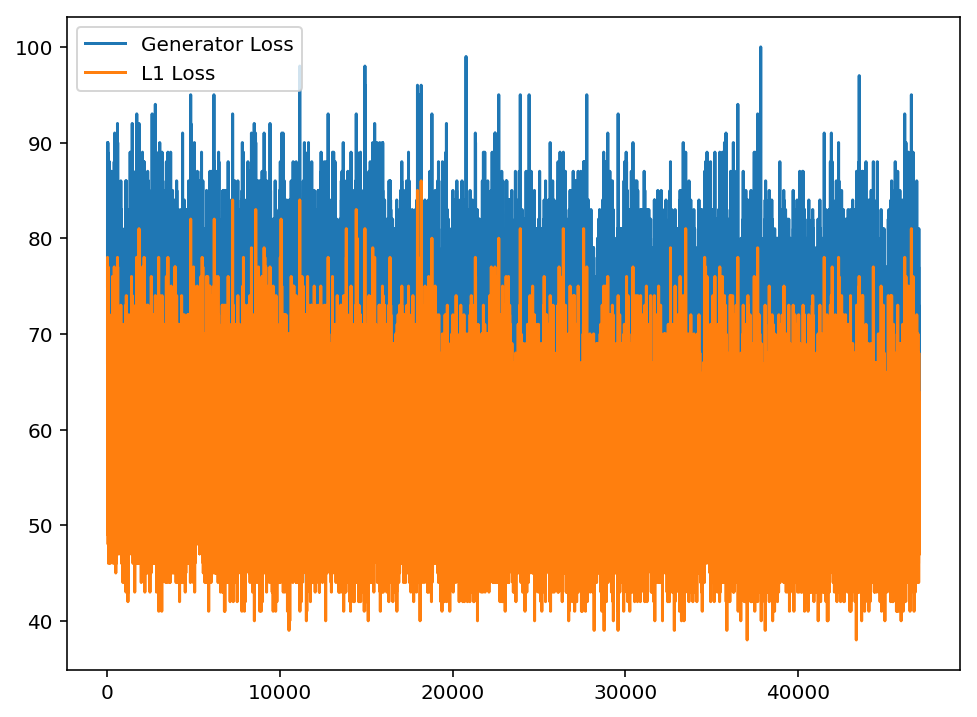

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(g_losses, label='Generator Loss')
plt.plot(l1_losses, label='L1 Loss')
plt.legend()
plt.show()

In [12]:
print('initial loss:', np.mean(g_losses[5000:10000]), '->', 'last loss:', np.mean(g_losses[-5000:]))

initial loss: 67.6504 -> last loss: 65.5298


---

## 200까지 학습된 모델을, 손글씨 모양 폰트들로만 다시 튜닝

In [11]:
SRC_PATH = './get_data/fonts/source/'
TRG_PATH = './get_data/fonts/target/'

src_font = glob.glob(os.path.join(SRC_PATH, '*.ttf'))[0]
print('source font:', src_font)

trg_fonts = glob.glob(os.path.join(TRG_PATH, '*.ttf'))
trg_fonts.sort()
print('target fonts:', len(trg_fonts), '개')
trg_fonts[-5:]

source font: ./get_data/fonts/source/source_font.ttf
target fonts: 53 개


['./get_data/fonts/target/52.ttf',
 './get_data/fonts/target/53.ttf',
 './get_data/fonts/target/54.ttf',
 './get_data/fonts/target/55.ttf',
 './get_data/fonts/target/56.ttf']

### 손글씨 폰트 filtering

In [12]:
font_filter = [13, 23, 26, 29, 30, 40, 41, 44, 50, 51, 52, 53, 54, 55, 56]
print(len(font_filter))
trg_fonts = [i for i in trg_fonts if int(i.split('/')[-1][:2]) in font_filter]
print(len(trg_fonts))
trg_fonts[-5:]

15
15


['./get_data/fonts/target/52.ttf',
 './get_data/fonts/target/53.ttf',
 './get_data/fonts/target/54.ttf',
 './get_data/fonts/target/55.ttf',
 './get_data/fonts/target/56.ttf']

#### png 생성

In [13]:
count = 0
canvas_size = 128
font_count = 0
src_char_size = 90
OUTPUT_PATH = './get_data/handwriting-dataset-11172/'
src_font = ImageFont.truetype(src_font, size=src_char_size)

for idx, font in enumerate(trg_fonts):
    font_count = 0
    font_label = font_filter[idx]
    if font_label in [51, 52, 54]:
        trg_char_size = 70
    else:
        trg_char_size = 100
    font = ImageFont.truetype(font, size=trg_char_size)
    character_count = 0
    
    if font_label in [13, 50, 51, 52, 53, 54, 55, 56]:
        file_path = './get_data/2350-common-hangul.txt'
        with open(file_path) as f:
            charset = f.read().split('\n')
        charset = charset[:-1]
    else:
        charset = [chr(i) for i in range(int('AC00', 16), int('D7A4', 16))]
    
    for c in charset:
        e = draw_example(c, src_font, font, canvas_size)
        if e:
            e.save(os.path.join(OUTPUT_PATH, "%d_%04d.png" % (idx, character_count)))
            character_count += 1
            count += 1
            font_count += 1
    print("%d font: processed %d chars" % (font_label, font_count))

print("processed %d chars, end" % count)

13 font: processed 2350 chars
23 font: processed 11172 chars
26 font: processed 11172 chars
29 font: processed 11172 chars
30 font: processed 11172 chars
40 font: processed 11172 chars
41 font: processed 11172 chars
44 font: processed 2350 chars
50 font: processed 2350 chars
51 font: processed 2350 chars
52 font: processed 2350 chars
53 font: processed 2350 chars
54 font: processed 2350 chars
55 font: processed 2350 chars
56 font: processed 2350 chars
processed 88182 chars, end


In [14]:
path = './get_data/handwriting-dataset-11172/'
a = glob.glob(os.path.join(path, '*.png'))
len(a)

88182

# object dataset 생성

In [15]:
from_dir = './get_data/handwriting-dataset-11172/'
save_dir = './dataset/hand_training'
train_path = os.path.join(save_dir, "train.obj")
val_path = os.path.join(save_dir, "val.obj")

pickle_examples(from_dir, train_path=train_path, val_path=val_path, \
                train_val_split=0.5, with_charid=True)

all data num: 88182
pickle with charid
10000 imgs saved in train.obj
10000 imgs saved in val.obj
20000 imgs saved in train.obj
20000 imgs saved in val.obj
30000 imgs saved in train.obj
30000 imgs saved in val.obj
40000 imgs saved in train.obj
40000 imgs saved in val.obj
43955 imgs saved in val.obj, end
44227 imgs saved in train.obj, end


#### fixed_sample 생성

In [25]:
sample_size = 48
img_size = 128
fontid = 0
data_dir = './dataset/hand_training'
save_dir = './fixed_sample/hand_training'

save_fixed_sample(sample_size, img_size, data_dir, save_dir)

unpickled total 44227 examples
train examples -> 44227


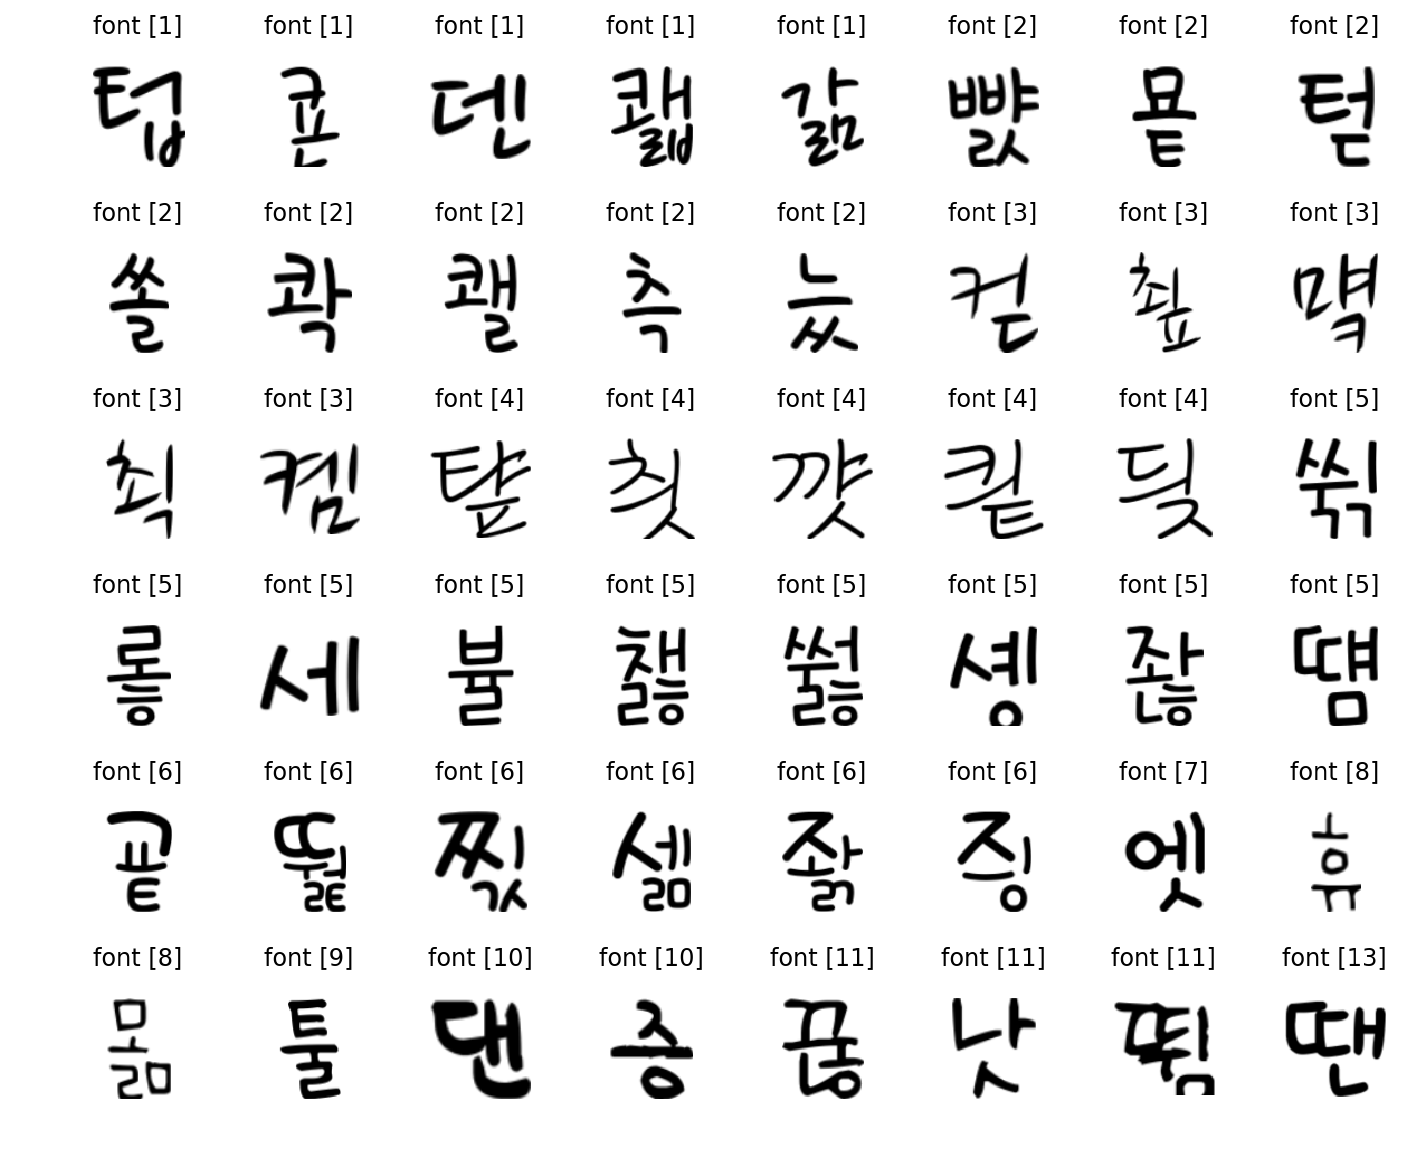

In [26]:
fixed_dir = './fixed_sample/hand_training'
fixed_target = torch.load(os.path.join(fixed_dir, 'fixed_target.pkl'))
fixed_label = torch.load(os.path.join(fixed_dir, 'fixed_label.pkl'))

plt.figure(figsize=(12, 10))
for idx, image in enumerate(fixed_target):
    plt.subplot(6, 8, idx+1)
    plt.imshow(image.reshape(128, 128).cpu().numpy(), cmap='gray')
    plt.axis('off')
    plt.title('font [%d]' % fixed_label[idx])
plt.show()

In [27]:
fixed_dir = './fixed_fake_handtraining/'
save_image(denorm_image(fixed_target.data), \
           os.path.join(fixed_dir, 'fixed_target_ground_truth.png'), \
           nrow=8, pad_value=255)

## Train 201~250 epoch
- 8.8시간 / 50epoch

In [28]:
data_dir = './dataset/hand_training'
fixed_dir = './fixed_sample/hand_training'
fixed_id = 0
fonts_num = 25
batch_size = 16
img_size = 128

In [29]:
trainer = Trainer(GPU, data_dir, fixed_dir, fonts_num, batch_size, img_size)

unpickled total 44227 examples
unpickled total 43955 examples
train examples -> 44227, val examples -> 43955
total batches: 2765


In [30]:
save_path = './fixed_fake_handtraining/'
to_model_path = './model_checkpoint/hand_training'
from_model_path = './model_checkpoint/new_training'
restore = ['200-0611-14:22-Encoder.pkl', '200-0611-14:22-Decoder.pkl', '200-0611-14:22-Discriminator.pkl']

max_epoch = 50
schedule = 20
lr = 0.0005
log_step = 1000
sample_step = 2000

losses = trainer.train(max_epoch=max_epoch, schedule=schedule, save_path=save_path, \
                       lr=lr, log_step=log_step, sample_step=sample_step, restore=restore, \
                       to_model_path=to_model_path, from_model_path=from_model_path, \
                       with_charid=True, save_nrow=8, fine_tune=True)

200 epoch trained model has restored
16:10:39 Epoch [201/250], step [1000/2765], l1_loss: 102.3111, d_loss: 0.2304, g_loss: 116.0056
16:14:21 Epoch [201/250], step [2000/2765], l1_loss: 105.1402, d_loss: 0.1109, g_loss: 111.6606
16:20:51 Epoch [202/250], step [1000/2765], l1_loss: 78.9494, d_loss: 0.1916, g_loss: 90.6409
16:24:32 Epoch [202/250], step [2000/2765], l1_loss: 66.1812, d_loss: 0.0663, g_loss: 71.2301
16:31:02 Epoch [203/250], step [1000/2765], l1_loss: 70.0894, d_loss: 0.0630, g_loss: 77.9924
16:34:42 Epoch [203/250], step [2000/2765], l1_loss: 57.5336, d_loss: 0.0792, g_loss: 61.5709
16:41:12 Epoch [204/250], step [1000/2765], l1_loss: 58.7144, d_loss: 0.0946, g_loss: 62.2281
16:44:53 Epoch [204/250], step [2000/2765], l1_loss: 69.4703, d_loss: 0.1837, g_loss: 73.2840
16:51:22 Epoch [205/250], step [1000/2765], l1_loss: 65.5284, d_loss: 0.0997, g_loss: 70.6804
16:55:03 Epoch [205/250], step [2000/2765], l1_loss: 70.2795, d_loss: 0.0269, g_loss: 80.2816
17:01:32 Epoch [206

23:27:53 Epoch [244/250], step [1000/2765], l1_loss: 51.8819, d_loss: 0.0240, g_loss: 56.2544
23:31:34 Epoch [244/250], step [2000/2765], l1_loss: 40.3144, d_loss: 0.0200, g_loss: 45.6364
23:38:03 Epoch [245/250], step [1000/2765], l1_loss: 63.5019, d_loss: 0.0140, g_loss: 68.4490
23:41:45 Epoch [245/250], step [2000/2765], l1_loss: 56.9674, d_loss: 0.0082, g_loss: 65.2039
23:48:19 Epoch [246/250], step [1000/2765], l1_loss: 58.4608, d_loss: 0.0366, g_loss: 62.6484
23:52:01 Epoch [246/250], step [2000/2765], l1_loss: 47.5478, d_loss: 0.2497, g_loss: 49.6870
23:58:32 Epoch [247/250], step [1000/2765], l1_loss: 57.4647, d_loss: 0.0009, g_loss: 67.8598
00:02:13 Epoch [247/250], step [2000/2765], l1_loss: 49.4682, d_loss: 0.0372, g_loss: 55.5515
00:08:44 Epoch [248/250], step [1000/2765], l1_loss: 68.3166, d_loss: 0.0343, g_loss: 81.4661
00:12:24 Epoch [248/250], step [2000/2765], l1_loss: 49.6234, d_loss: 0.1025, g_loss: 60.6216
00:18:53 Epoch [249/250], step [1000/2765], l1_loss: 55.0818

In [31]:
l1_losses, const_losses, category_losses, d_losses, g_losses = losses

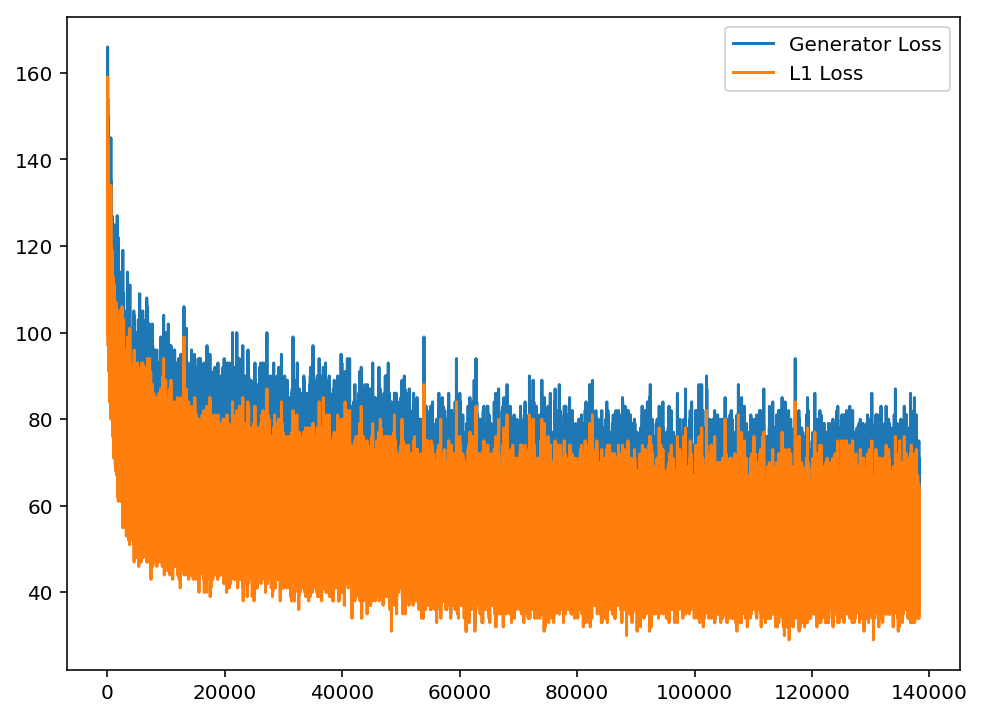

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(g_losses, label='Generator Loss')
plt.plot(l1_losses, label='L1 Loss')
plt.legend()
plt.show()

In [34]:
print('initial loss:', np.mean(g_losses[20000:30000]), '->', 'last loss:', np.mean(g_losses[-10000:]))

initial loss: 66.0677 -> last loss: 56.4107
